# Exercise: k-nearest neighbor (kNN) classifier with sklearn

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist
import time


# load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# 60000 training dataset // 100000 training dataset
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


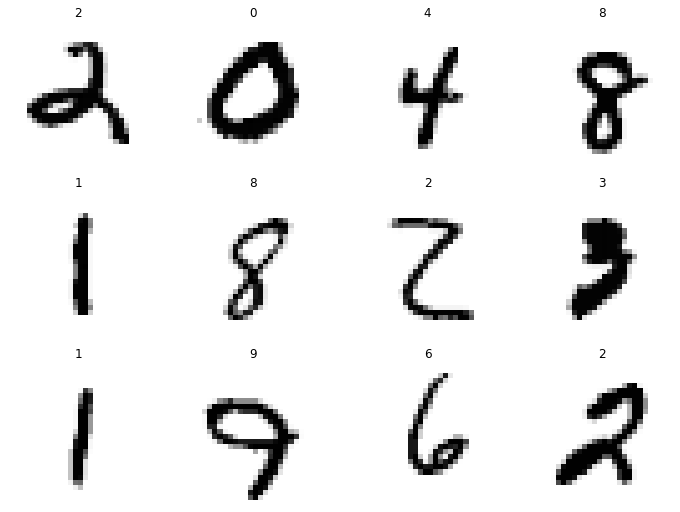

In [2]:
# Display Some of the (training) data
sample_index = np.random.choice(60000, size=12)
num_samples = sample_index.size

random_samples = train_X[sample_index]

plt.figure(figsize=(12, 12))

for k in range(num_samples):
    plt.subplot(4, 4, k + 1)
    plt.imshow(random_samples[k].reshape(28, 28),cmap='Greys')
    plt.title(train_y[sample_index[k]])
    plt.axis('off')

    
plt.show()

In [3]:
# Prepare dataset for training (reshape)

X_train = train_X.reshape(60000,784).astype(float)
X_test = test_X.reshape(10000,784).astype(float)
y_train = train_y
y_test = test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# kNN with k=5 and L2 norm

In [4]:
# k-NN training with sklearn
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5, p = 2)      # 5-nearest neighbor // L2 norm
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [5]:
# Measure the accuracy of the kNN
from sklearn.metrics import accuracy_score

begin_time = time.time()
pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, pred))
end_time = time.time()

print("run time:", end_time - begin_time)

Accuracy:  0.9688
run time: 51.87040591239929


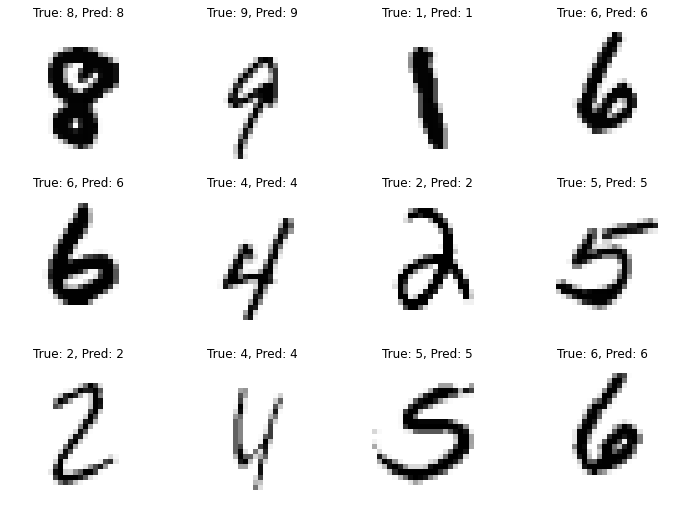

In [6]:
# Display test result (predicted labels and actual label)

sample_index = np.random.choice(10000, size=12)     # take 12 random sample index
num_samples = sample_index.size

random_samples = test_X[sample_index]

plt.figure(figsize=(12, 12))

for k in range(num_samples):
    plt.subplot(4, 4, k + 1)
    plt.imshow(random_samples[k].reshape(28, 28),cmap='Greys')
    plt.title("True: " + str( test_y[sample_index[k]]) + ", Pred: " + str(pred[sample_index[k]]))
    plt.axis('off')

    
plt.show()

In [8]:
# run PCA to reduce the data dimension
from sklearn.decomposition import PCA

pca = PCA(n_components = 10,svd_solver= 'full')
pca.fit(X_train)

# Find the new reduced dimensional representations
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)




Accuracy:  0.9276


In [9]:
# KNN with PCA dimension reduction
clf= KNeighborsClassifier(n_neighbors= 5, p = 2)   # kNN on PCA data 
clf.fit(X_train_reduced , y_train)


# Test the accuracy
begin_time = time.time()
pred = clf.predict(X_test_reduced)
print("Accuracy: ", accuracy_score(y_test, pred))
end_time = time.time()

print("run time:", end_time - begin_time)

Accuracy:  0.9276
run time: 1.4969220161437988
